In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [ ]:
expres_code = ['ang','dis','fea','hap','sad','sur']
expressions = [ 0,   1,   2,   3,   4,   5]

In [ ]:
data_path = '/content/drive/My Drive/dataset/voilajones_ck+/'
def read_data(dir_path):
    img_names = []
    img_data_list = []
    labels = []
    img_list = os.listdir(dir_path)
    for img in img_list:
        input_img = cv2.imread(dir_path + img)
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img)
        label = img[4:7]  # each name of image have 2 char for label from index 3-5
        labels.append(expres_code.index(label))
        img_names.append(img)
    img_data = np.array(img_data_list)
    print(img_data)
    return img_data, labels, img_names

X, Y, img_names = read_data(data_path)

[[[[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 63  63  63]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 18  18  18]
   [ 18  18  18]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 64  64  64]
   [ 64  64  64]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 14  14  14]
   ...
   [ 36  36  36]
   [ 32  32  32]
   [ 32  32

In [ ]:
img_x=np.array(X)
img_x = img_x.astype('float32')
img_x = img_x/255
img_x.shape

(927, 224, 224, 3)

In [ ]:
labels=np.array(Y)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4,

In [ ]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
skf.get_n_splits(img_x, labels)

10

In [ ]:
import matplotlib.pyplot as plt
input_shape = (224,224,3)
def cnn_model(x_train,x_test,y_test,y_train):
    model = Sequential()

    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=128,kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=256,kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(6))
    model.add(Activation('softmax'))
    
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=15, batch_size=30,verbose=1)
    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

In [ ]:
for train_index, test_index in skf.split(img_x, labels):
    print("TRAIN:", train_index)
    print("TEST:", test_index)

TRAIN: [  0   1   2   3   4   5   6   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  74  75  76  77  78  79
  80  81  82  83  84  85  86  88  89  90  91  92  93  94  95  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 118
 119 120 122 123 125 126 127 128 129 130 131 132 133 134 136 137 138 139
 140 141 142 143 145 146 147 148 149 150 151 153 154 155 156 157 158 159
 160 161 163 164 165 166 167 168 169 170 171 173 174 176 177 179 180 181
 182 183 184 186 187 188 189 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 219 220
 221 222 223 224 225 226 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 265 266 267 268 269 270 271

Epoch 1/15
834/834 [==============================] - 4s 4ms/step - loss: 2.1137 - accuracy: 0.2866
Epoch 2/15
834/834 [==============================] - 4s 4ms/step - loss: 1.2054 - accuracy: 0.5791
Epoch 3/15
834/834 [==============================] - 4s 4ms/step - loss: 0.5548 - accuracy: 0.8034
Epoch 4/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2391 - accuracy: 0.9113
Epoch 5/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1812 - accuracy: 0.9472
Epoch 6/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1352 - accuracy: 0.9592
Epoch 7/15
834/834 [==============================] - 4s 4ms/step - loss: 0.0985 - accuracy: 0.9652
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1034 - accuracy: 0.9760
Epoch 9/15
834/834 [==============================] - 4s 4ms/step - loss: 0.0649 - accuracy: 0.9808
Epoch 10/15
834/834 [==============================] - 4s 4ms/step - loss: 0.0317 - accuracy: 0.9892

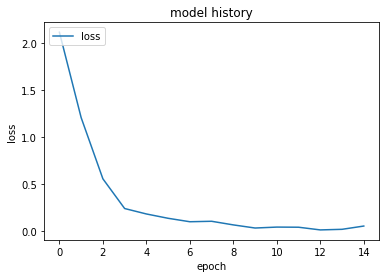

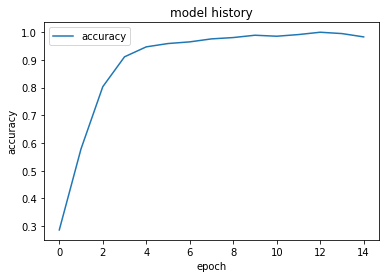

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 4s 4ms/step - loss: 2.5192 - accuracy: 0.2626
Epoch 2/15
834/834 [==============================] - 4s 4ms/step - loss: 1.3033 - accuracy: 0.5276
Epoch 3/15
834/834 [==============================] - 4s 4ms/step - loss: 0.6620 - accuracy: 0.7830
Epoch 4/15
834/834 [==============================] - 4s 4ms/step - loss: 0.3902 - accuracy: 0.8681
Epoch 5/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2510 - accuracy: 0.9161
Epoch 6/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1657 - accuracy: 0.9388
Epoch 7/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1198 - accuracy: 0.9652
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1107 - accuracy: 

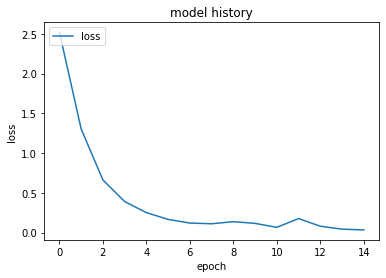

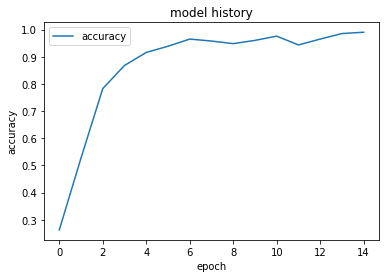

0.9784946441650391
[[12  0  0  0  2  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 4s 4ms/step - loss: 1.9321 - accuracy: 0.2974
Epoch 2/15
834/834 [==============================] - 4s 4ms/step - loss: 1.0257 - accuracy: 0.6379
Epoch 3/15
834/834 [==============================] - 4s 4ms/step - loss: 0.4637 - accuracy: 0.8321
Epoch 4/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2246 - accuracy: 0.9197
Epoch 5/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2187 - accuracy: 0.9173
Epoch 6/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1124 - accuracy: 0.9556
Epoch 7/15
834/834 [==============================] - 4s 4ms/step - loss: 0.0672 - accuracy: 0.9736
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.03

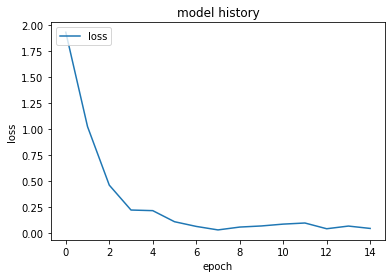

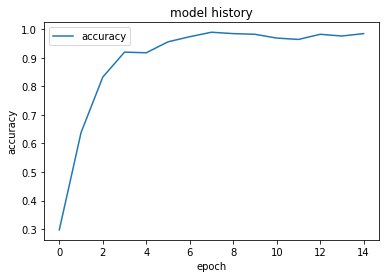

0.9892473220825195
[[14  0  0  0  0  0]
 [ 1 16  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 4s 4ms/step - loss: 1.9524 - accuracy: 0.3118
Epoch 2/15
834/834 [==============================] - 4s 4ms/step - loss: 0.9963 - accuracy: 0.6535
Epoch 3/15
834/834 [==============================] - 4s 4ms/step - loss: 0.4685 - accuracy: 0.8285
Epoch 4/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2572 - accuracy: 0.9185
Epoch 5/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1802 - accuracy: 0.9424
Epoch 6/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1170 - accuracy: 0.9640
Epoch 7/15
834/834 [==============================] - 4s 4ms/step - loss: 0.0839 - accuracy: 0.9736
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.04

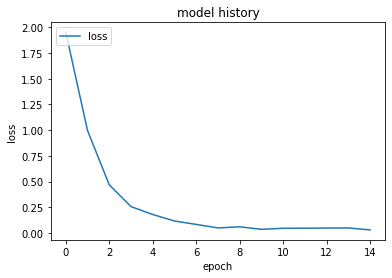

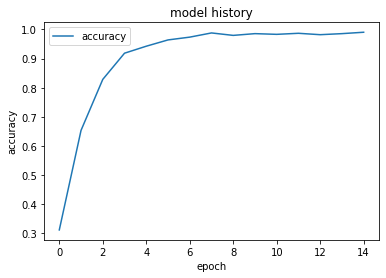

0.9892473220825195
[[13  1  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 4s 4ms/step - loss: 2.8266 - accuracy: 0.2458
Epoch 2/15
834/834 [==============================] - 4s 4ms/step - loss: 1.2529 - accuracy: 0.5779
Epoch 3/15
834/834 [==============================] - 4s 4ms/step - loss: 0.6710 - accuracy: 0.7626
Epoch 4/15
834/834 [==============================] - 4s 4ms/step - loss: 0.3668 - accuracy: 0.8705
Epoch 5/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1696 - accuracy: 0.9496
Epoch 6/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1048 - accuracy: 0.9676
Epoch 7/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1036 - accuracy: 0.9664
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.08

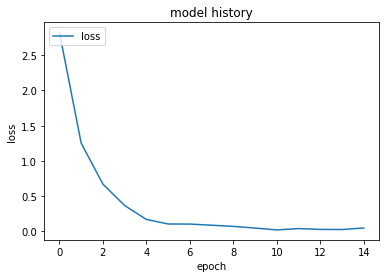

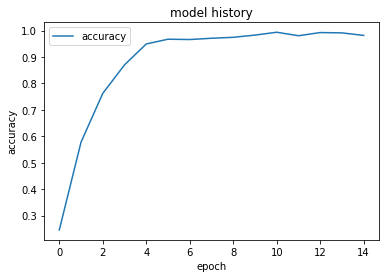

1.0
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 4s 4ms/step - loss: 2.0722 - accuracy: 0.2542
Epoch 2/15
834/834 [==============================] - 4s 4ms/step - loss: 1.3844 - accuracy: 0.4868
Epoch 3/15
834/834 [==============================] - 4s 4ms/step - loss: 0.7909 - accuracy: 0.7158
Epoch 4/15
834/834 [==============================] - 4s 4ms/step - loss: 0.5387 - accuracy: 0.8189
Epoch 5/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2978 - accuracy: 0.8969
Epoch 6/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2150 - accuracy: 0.9293
Epoch 7/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1326 - accuracy: 0.9544
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1235 - accuracy: 

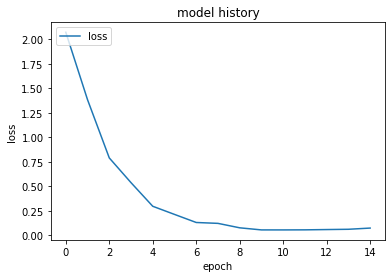

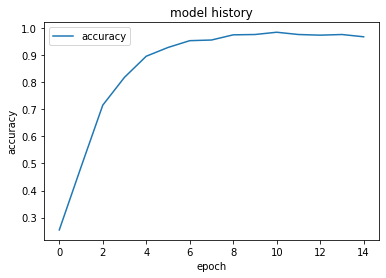

1.0
[[14  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 24]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 4s 4ms/step - loss: 2.2802 - accuracy: 0.2314
Epoch 2/15
834/834 [==============================] - 4s 4ms/step - loss: 1.5700 - accuracy: 0.3873
Epoch 3/15
834/834 [==============================] - 4s 4ms/step - loss: 0.9130 - accuracy: 0.6990
Epoch 4/15
834/834 [==============================] - 4s 4ms/step - loss: 0.4840 - accuracy: 0.8285
Epoch 5/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2925 - accuracy: 0.8981
Epoch 6/15
834/834 [==============================] - 4s 4ms/step - loss: 0.2020 - accuracy: 0.9305
Epoch 7/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1682 - accuracy: 0.9472
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.1409 - accuracy: 

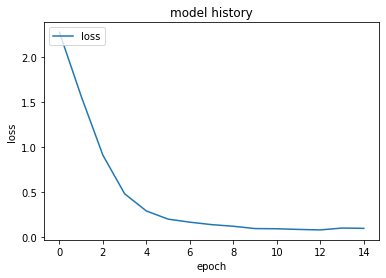

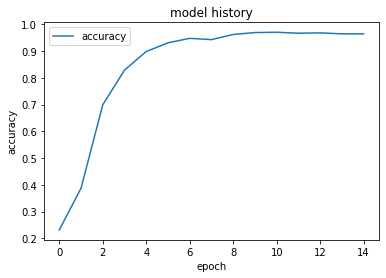

0.9892473220825195
[[12  0  0  0  1  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
835/835 [==============================] - 4s 4ms/step - loss: 2.1487 - accuracy: 0.2383
Epoch 2/15
835/835 [==============================] - 4s 4ms/step - loss: 1.5713 - accuracy: 0.4012
Epoch 3/15
835/835 [==============================] - 4s 4ms/step - loss: 0.8916 - accuracy: 0.6910
Epoch 4/15
835/835 [==============================] - 4s 4ms/step - loss: 0.4641 - accuracy: 0.8527
Epoch 5/15
835/835 [==============================] - 4s 4ms/step - loss: 0.2165 - accuracy: 0.9186
Epoch 6/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1491 - accuracy: 0.9449
Epoch 7/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1028 - accuracy: 0.9677
Epoch 8/15
835/835 [==============================] - 4s 4ms/step - loss: 0.08

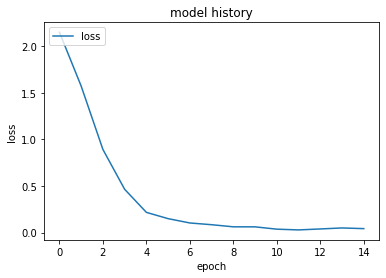

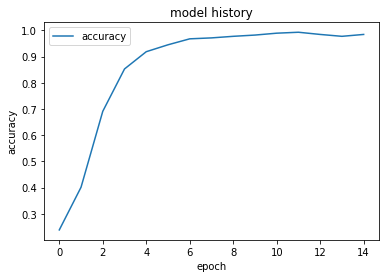

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
835/835 [==============================] - 4s 4ms/step - loss: 2.0059 - accuracy: 0.2635
Epoch 2/15
835/835 [==============================] - 4s 4ms/step - loss: 1.2312 - accuracy: 0.5629
Epoch 3/15
835/835 [==============================] - 4s 4ms/step - loss: 0.6252 - accuracy: 0.7784
Epoch 4/15
835/835 [==============================] - 4s 4ms/step - loss: 0.2883 - accuracy: 0.9006
Epoch 5/15
835/835 [==============================] - 4s 4ms/step - loss: 0.2056 - accuracy: 0.9210
Epoch 6/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1369 - accuracy: 0.9557
Epoch 7/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1412 - accuracy: 0.9629
Epoch 8/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1133 - accuracy: 

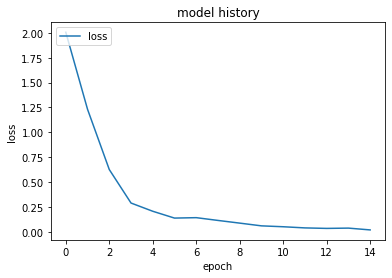

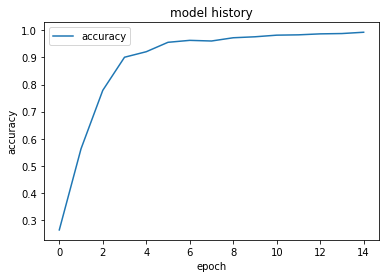

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
835/835 [==============================] - 4s 4ms/step - loss: 2.4039 - accuracy: 0.2754
Epoch 2/15
835/835 [==============================] - 4s 4ms/step - loss: 1.3081 - accuracy: 0.5186
Epoch 3/15
835/835 [==============================] - 4s 4ms/step - loss: 0.6537 - accuracy: 0.7868
Epoch 4/15
835/835 [==============================] - 4s 4ms/step - loss: 0.2678 - accuracy: 0.8970
Epoch 5/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1875 - accuracy: 0.9353
Epoch 6/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1522 - accuracy: 0.9569
Epoch 7/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1025 - accuracy: 0.9641
Epoch 8/15
835/835 [==============================] - 4s 4ms/step - loss: 0.1133 - accuracy: 

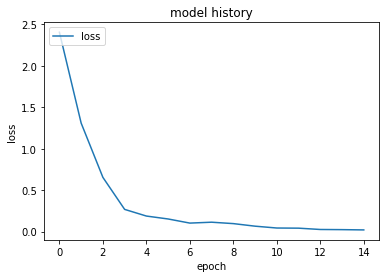

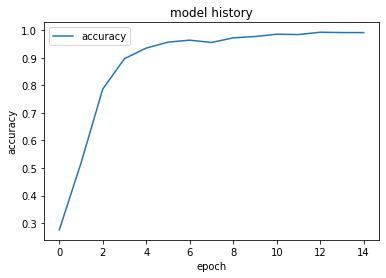

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------


In [ ]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_x,labels):
    x_train, x_test = img_x[train_index,:,:,:], img_x[test_index,:,:,:]
    y_train, y_test = labels[train_index], labels[test_index]
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("---------------------------------------------------------------------------")

In [ ]:
print(prediction)

[1.0, 0.9784946441650391, 0.9892473220825195, 0.9892473220825195, 1.0, 1.0, 0.9892473220825195, 1.0, 1.0, 1.0]


In [ ]:
for x in range(len(confusion_list)): 
    print (confusion_list[x],sep = "\n")
    print("----------------------------") 